In [40]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import skimage as ski
import matplotlib.pyplot as plt

## Lets try a 1-D series

In [38]:
x = np.linspace(0,6*np.pi,100)
y = np.sin(x) + np.cos(x)

f = np.fft.fft(y)

fig = make_subplots(rows=3, cols=1, subplot_titles=("Original Signal", "Magnitude of FFT", "Phase of FFT"))

fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='Original Signal'), row=1, col=1)
fig.add_trace(go.Scatter(x=np.arange(len(f)), y=np.abs(f), mode='lines', name='Magnitude'), row=2, col=1)
fig.add_trace(go.Scatter(x=np.arange(len(f)), y=np.angle(f), mode='lines', name='Phase'), row=3, col=1)

fig.update_layout(height=800, title_text="FFT Analysis")
fig.show()

##  Let's try 2-D FFT with an image

In [ ]:
!wget https://upload.wikimedia.org/wikipedia/commons/b/b0/Bengal_tiger_%28Panthera_tigris_tigris%29_female_3_crop.jpg -O tiger.jpg

--2025-11-01 14:30:19--  https://upload.wikimedia.org/wikipedia/commons/b/b0/Bengal_tiger_%28Panthera_tigris_tigris%29_female_3_crop.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15830215 (15M) [image/jpeg]
Saving to: ‘tiger.jpg’

tiger.jpg           100%[===================>]  15.10M  23.4MB/s    in 0.6s    

2025-11-01 14:30:20 (23.4 MB/s) - ‘tiger.jpg’ saved [15830215/15830215]



Image loaded. image.shape=(3000, 4500, 3)
Image resized. image.shape=(1000, 1500, 3)
max_maginitude=np.float64(657754.0007046484)
masked_pixels=np.int64(1453403) ratio=np.float64(0.9689353333333334)


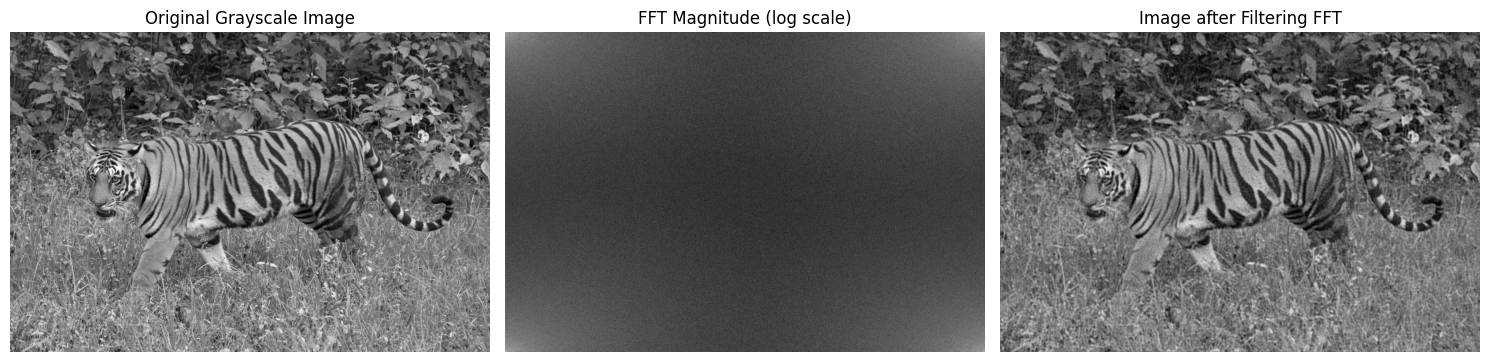

In [54]:
# Load the image
image_path = 'tiger.jpg'
image = ski.io.imread(image_path)
print(f"Image loaded. {image.shape=}")

image = ski.transform.resize(image, (1000,1500,3), anti_aliasing=True)
print(f"Image resized. {image.shape=}")

h,w,_ = image.shape

# Convert to grayscale
gray_image = ski.color.rgb2gray(image)

# Perform 2D FFT
fft_image = np.fft.fft2(gray_image)
fft_magnitude = np.abs(fft_image)

# Filter the FFT (set magnitudes less than 0.5 to 0)
filtered_fft_image = fft_image.copy()

# generate mask
max_maginitude = np.max(fft_magnitude)
print(f"{max_maginitude=}")

mask = fft_magnitude < max_maginitude*0.0005
masked_pixels = np.sum(mask)
ratio = masked_pixels / (h*w)
print(f"{masked_pixels=} {ratio=}")

filtered_fft_image[mask] = 0

# Perform inverse FFT
filtered_image = np.fft.ifft2(filtered_fft_image)
filtered_image = np.abs(filtered_image) # Take the absolute value as inverse FFT can result in complex numbers

# Display the images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
ax = axes.ravel()

ax[0].imshow(gray_image, cmap='gray')
ax[0].set_title('Original Grayscale Image')
ax[0].axis('off')

ax[1].imshow(np.log(fft_magnitude + 1), cmap='gray') # Use log scale for better visualization of magnitude
ax[1].set_title('FFT Magnitude (log scale)')
ax[1].axis('off')

ax[2].imshow(filtered_image, cmap='gray')
ax[2].set_title('Image after Filtering FFT')
ax[2].axis('off')

plt.tight_layout()
plt.show()